![title](https://www.otexts.org/sites/default/files/fpp/images/decomp1.png)

A time series is a plot that visualizes the change of a value over time. It looks like a lot of lines, changing over time, but there is a lot of meaning hidden inside these informative lines. We'll go through visualizing time series data, and then we'll go on around dealing with Non-Stationary time series data. 

## Visualizing Time Series 

First, let's load our dataset, of arrivals to Australia.

In [62]:
import pandas as pd
aus = pd.read_csv("australia.csv")
aus.head()

,Date,Number of arrivals
0,1991M01,27566
1,1991M02,27621
2,1991M03,25696
3,1991M04,21653
4,1991M05,21197


Since our date column is not standarized, we'll first turn it into a proper date, by replacing that M with a dash (-) and adding an arbitrary day (in this case, the first of the month).

In [63]:
def Clean_Date(date):
    date = date.replace("M","-")
    date = date + "-01"
    return date

aus.Date = aus.Date.apply(Clean_Date)
aus.head()

,Date,Number of arrivals
0,1991-01-01,27566
1,1991-02-01,27621
2,1991-03-01,25696
3,1991-04-01,21653
4,1991-05-01,21197


There's one more thing we need to do. We need to convert our date column to a **datetime** type object. This is the best type for working with dates in Python, as it's easier for the rest of our functions to understand. For this, we use the pandas to_datetime function.

In [64]:
aus.Date = pd.to_datetime(aus.Date)
aus.head()

,Date,Number of arrivals
0,1991-01-01,27566
1,1991-02-01,27621
2,1991-03-01,25696
3,1991-04-01,21653
4,1991-05-01,21197


Now we can start plotting. If you have a dataset that doesn't contain a formatted date column, then you can create one yourself! But since we comfortably have one already, let's just use it. To plot time series data, we can just use the matplotlib **plot** function.

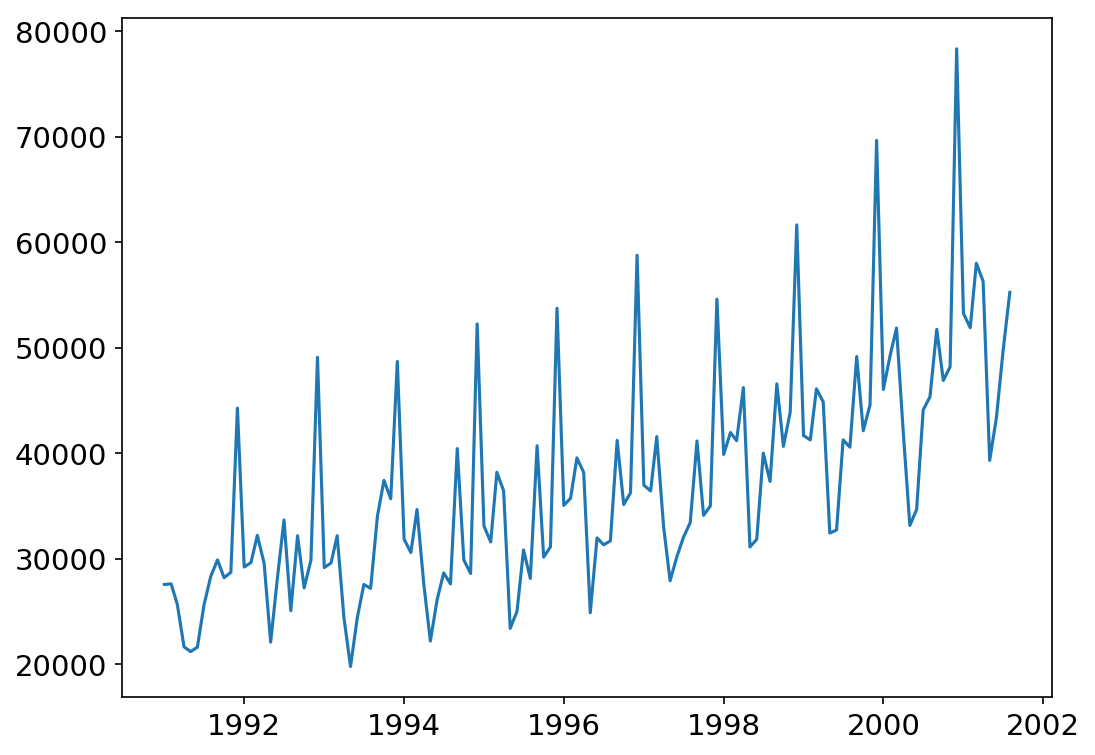

In [65]:
import matplotlib.pyplot as plt
from matplotlib import rcParams 
#Our usual Parameter function.
def MatplotLib_Params():
    #The size of the figure.
    rcParams['figure.figsize'] = (8, 6)
    #Dots per inch or resolution of the figure.
    rcParams['figure.dpi'] = 150
    #Size of the letters and numbers in the plot.
    rcParams['font.size'] = 14
    
#Set the date column as the index of the dataframe, it's very important to do this!
aus = aus.set_index("Date")
MatplotLib_Params()
plt.plot(aus)
plt.show()

As we can see, the number of arrivals steadily increased over the years, where it goes up and down each year. Overall, there's an increasing **overall trend** , with some spikes on certain years. We can see plots for certain dates by slicing the dates like we do with lists and dataframes.

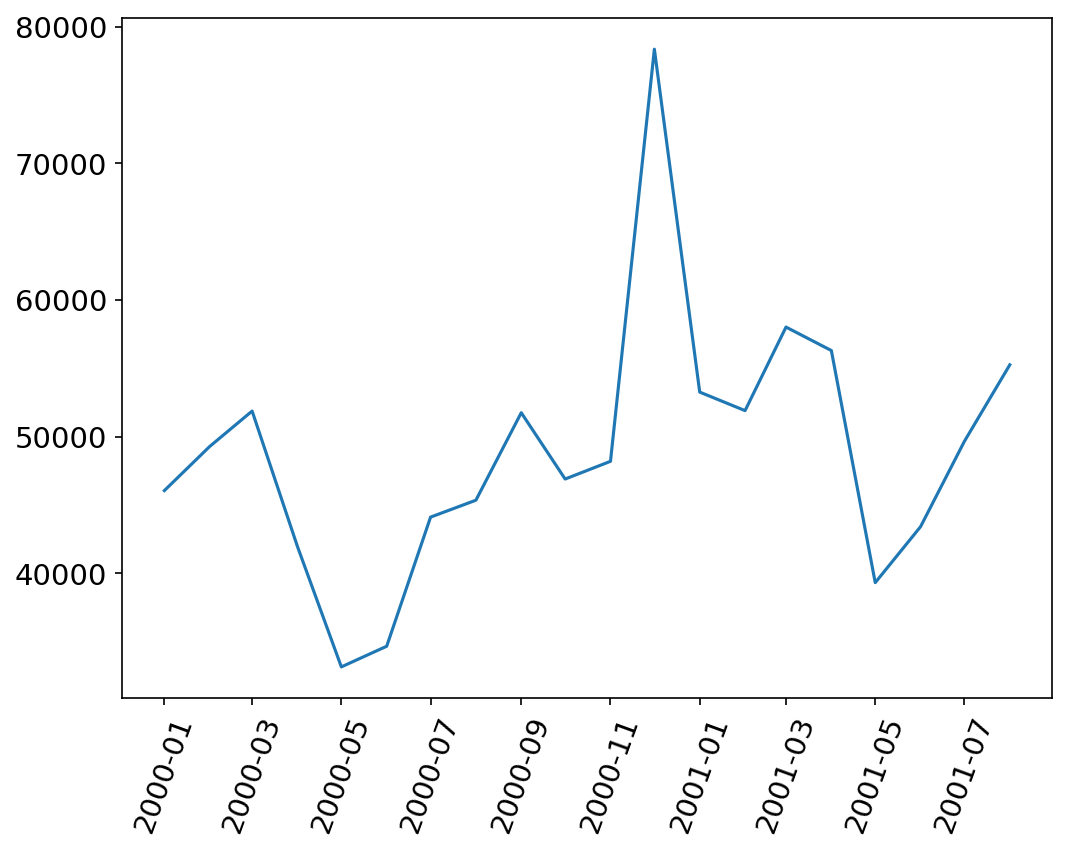

In [70]:
plt.plot(aus['2000-01-01':])
plt.xticks(rotation = 70) #Rotate the X axis for better visibility.
plt.show()

Looks like most arrivals happen in December, which makes sense since people want to be with their family over the holidays.

#### Your turn now
Plot the time series for the Australian dataset, for dates before 1996.

In [71]:
#Your code here.

## Checking Stationarity of a Time Series.

A time series is said to be **stationary** if the mean and variance do not change over time, and its autocovariance doesn't depend on time. It may sound confusing, but let's visualize the rolling mean and variance of our pros time series, so you can get a clearer picture.

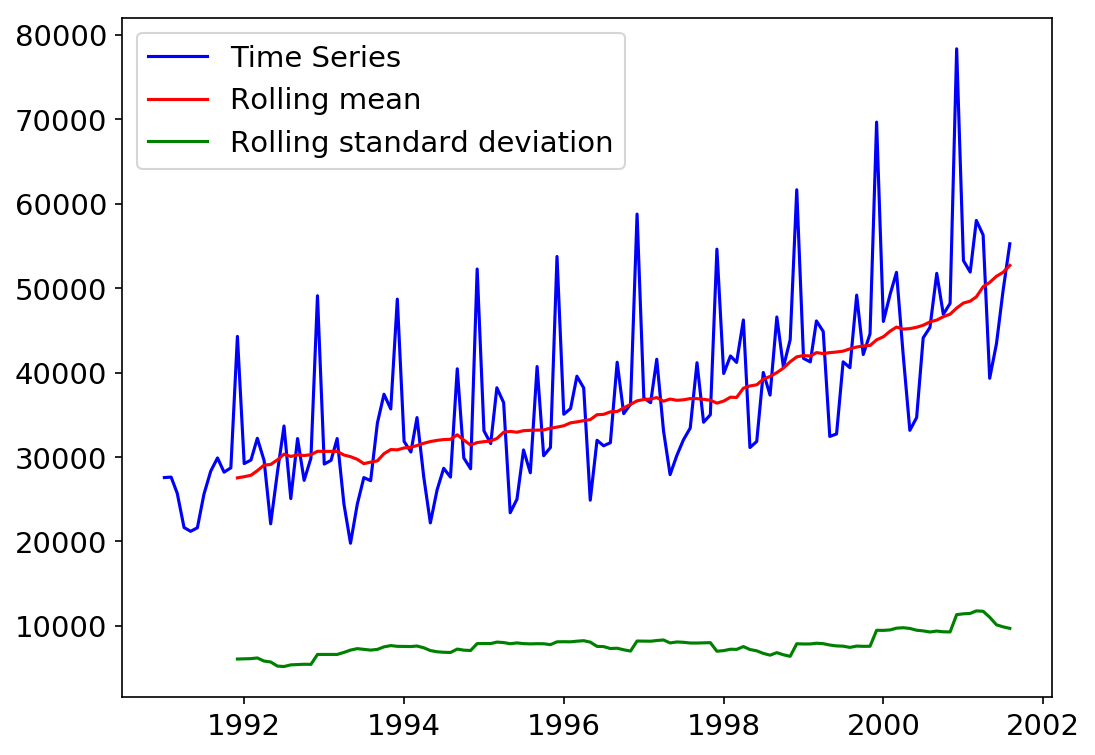

In [72]:
def plot_Statistics(data):
    #Calculate rolling mean and standard deviation.
    
    rmean = data.rolling(window= 12,center = False).mean() #Yearly window.
    rstd = data.rolling(window=12,center = False).std() 

    #Plot data and rolling statistics
    dataplot = plt.plot(data, color='blue',label='Time Series')
    meanplot = plt.plot(rmean, color='red', label='Rolling mean')
    stdplot = plt.plot(rstd, color='green', label = 'Rolling standard deviation')
    plt.legend(loc='best')
    plt.show()
    

plot_Statistics(aus)

For our full time series, the mean and standard deviation are not constant, so this time series is **not** stationary. What makes it this way? One of them is the **Trend**. The trend is the overall direction the data is going over time. In this case, the arrivals to Australia are **increasing** over time.  The other one is the **Seasonal Component**. As we saw in plots before, most arrivals come in the holidays, summer and early spring while the least arrivals happen at May. This means this changes in values happen at some points in time, or a **season**. 

## Removing non-stationarity in a Time Series

### Removing Trend using Moving Averages. 

We can use several methods for removing the Trend of a time series, but in this notebook, we'll use the **Moving Averages** method. First, let's visualize the time series with a **transformation**, which punishes higher values of the trend, and makes the range of the values smaller.

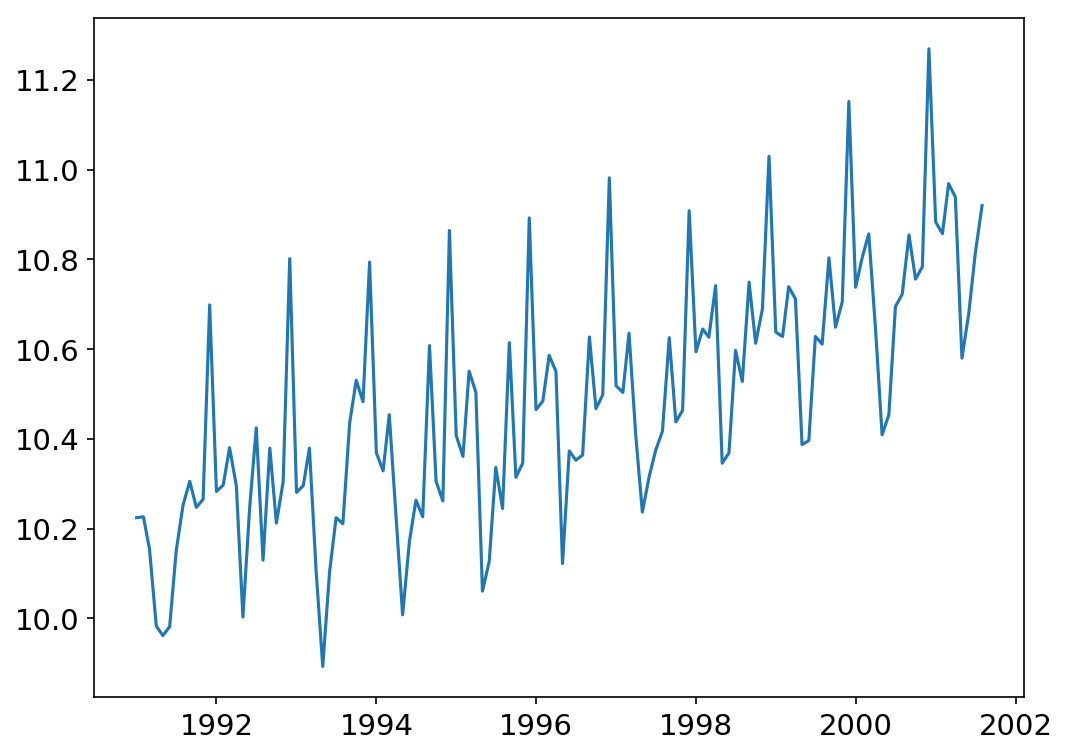

In [75]:
import numpy as np
aus_log = np.log(aus)
plt.plot(aus_log)
plt.show()

Next, let's plot the rolling mean of the time series, like we did before. This is the **moving average** of the time series.

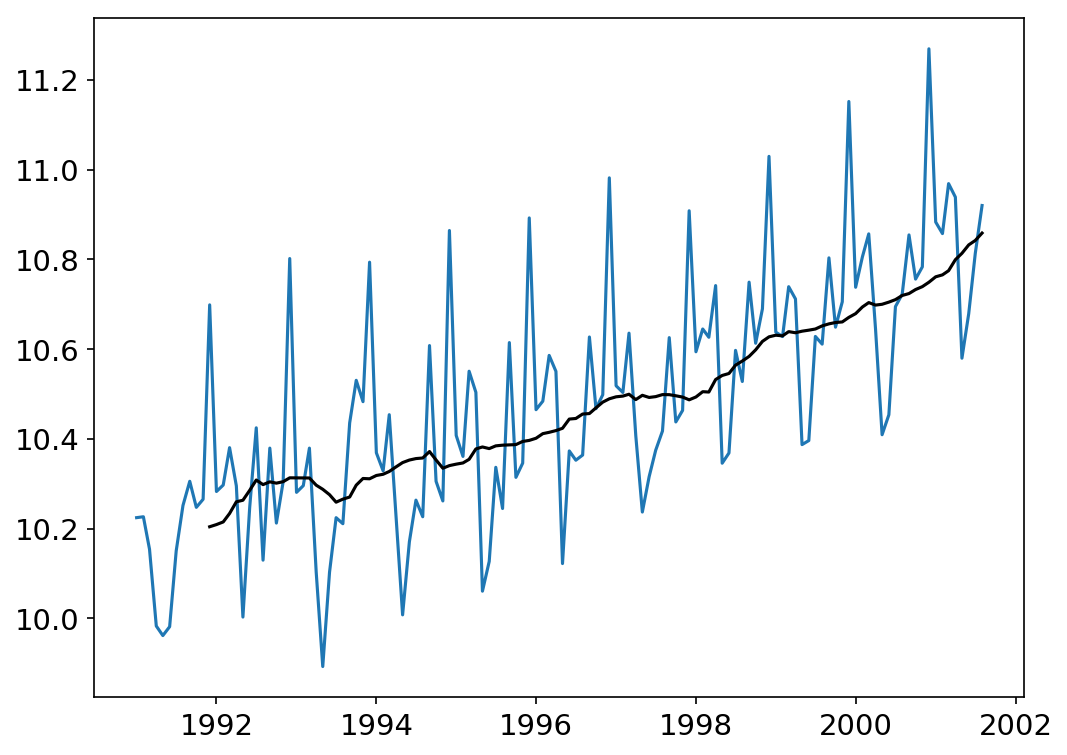

In [78]:
moving_average = aus_log.rolling(window= 12,center = False).mean() #Yearly window.
plt.plot(aus_log)
plt.plot(moving_average, color='black')
plt.show()

Now, let's substract it from the original time series, to get the difference. This will create some NaN values for some months.

In [83]:
m_avg_diff = aus_log - moving_average
m_avg_diff.head(24)

,Number of arrivals
Date,
1991-01-01,NaN
1991-02-01,NaN
1991-03-01,NaN
1991-04-01,NaN
1991-05-01,NaN
1991-06-01,NaN
1991-07-01,NaN
1991-08-01,NaN
1991-09-01,NaN


Finally, let's remove the NaN rows, and plot the statistics again.

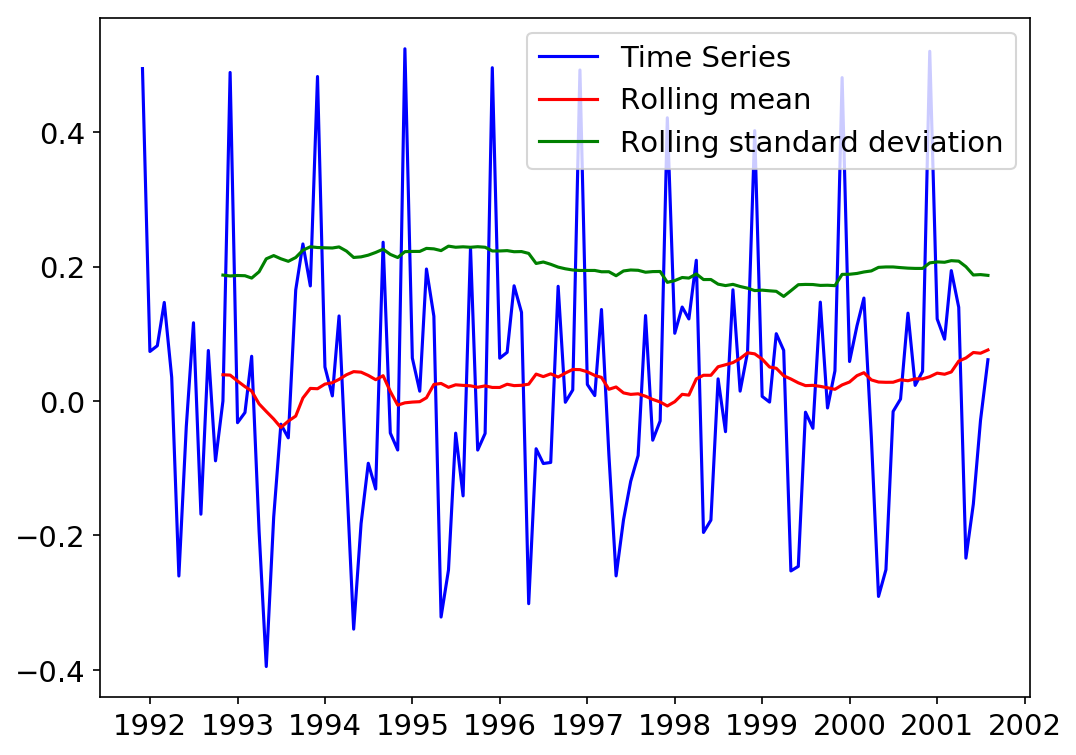

In [84]:
m_avg_diff.dropna(inplace=True)
plot_Statistics(m_avg_diff)
plt.show()

See the difference? This time series doesn't have an upwards trend like the original one, which effectively means we removed the trend.